<div style="border:solid green 2px; padding: 20px">
    
<b>Дмитрий, привет! Это Александр</b> Я рад тебя видеть на финальном спринте (Основной проект).

---

Я буду красить комментарии цветом, пожалуйста, не удаляй их:

<div class="alert alert-block alert-danger">✍
    

__Комментарий от тимлида №1__

Такой комментарий нужно исправить обязательно, он критически влияет на удачное выполнение проекта.
</div>
    
---

<div class="alert alert-block alert-warning">📝
    

__Комментарий от тимлида №1__


Такой комментарий является рекомендацией или советом. Можешь использовать их на своё усмотрение.
</div>

---

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__

Такой комментарий  говорит о том, что было сделано что-то качественное и правильное =)
</div>
    
---
    
Предлагаю работать над проектом в диалоге: если у тебя возникают вопросы — пиши об этом в слаке, не стесняйся. Так же, мне будет легче отследить изменения, если ты выделишь свои комментарии:   
    
<div class="alert alert-info"> <b>Комментарии студента:</b> Например, вот так.</div>
    
    
---

# Анализ оттока клиентов "Метанпромбанк"

**Заказчик:** Метанпромбанк

**Цель:** 
- поиск сегмента клиентов, которые больше всего склонны к уходу из банка
- подготовка рекомендаций к отделу маркетинга банка "Метанпромбанк"

**План работы:**
1. Загрузка и описание данных.
2. Подготовка данных:
- анализ природы пропусков и их разумная обработка;
- кодирование (для использования в анализе корреляции).
3. EDA:
- анализ распределения признаков, в тч в разрезе оттока (непрерывные - ищем отточные
интервалы, категориальные/дискретные - ищем значения признака с оттоком выше, чем по банку);
- анализ портретов клиентов в разрезе оттока;
- корреляционный анализ (в тч интерпретация).
4. Проверка статистических гипотез - минимум две (чем неочевиднее, тем интереснее), не забываем про обоснование инструмента.
5. Подведение промежуточных итогов - выводы по результатам EDA, корреляционного анализа и гипотез, выделение признаков, влияющих на оттток.
6. Сегментация (неузкие сегменты (от 500 клиентов на сегмент); отток лучше, чем средний уровень оттока по банку).
7. Приоритизация сегментов (у маркетинга нет автоматизированных систем, работаю руками).
8. Формирование рекомендаций (таргетированных) по работе с ними - правильной рекомендации нет, чем интереснее - тем лучше:)

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__


Отличная практика - расписывать цель и основные этапы перед началом проекта

##  Загрузка и описание данных. 

In [1]:
# импортируем необходимые для работы библиотеки:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st


<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__


Хорошо, модули загружены

In [2]:
df = pd.read_csv('/datasets/bank_scrooge.csv')
df.head()

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


Изначально в данных мы видим, что названия столбцов сделаны не по правилам. Приведем их все к нижнему регистру и правильному названию. 

In [3]:
df = df.rename(columns = {'USERID':'user_id'})
df.columns = df.columns.str.lower()


In [4]:
df

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,814.0,Рыбинск,М,27.0,1,78144.65,1,0,1,18943.64,0
9996,139170,894.0,Ярославль,М,46.0,0,NaN,1,1,0,196898.29,0
9997,115639,903.0,Ярославль,М,24.0,0,NaN,2,1,1,108905.09,0
9998,148700,777.0,Ярославль,Ж,68.0,3,865457.97,3,0,1,86874.90,0


Далее посмотрим типы данных и количество пропусков. 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  est_salary     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


В данных мы видим, что есть неккоректные типы данных. В столбце age не может быть дробных чисел. Поэтмоу нужно заменить сего на тип INT. Также в данном столбце 26 пропусков. Их можно удалить, тк это 0.2%. 

In [6]:
dd = df[df['age'].isnull()]
dd.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1247,228075,932.0,Ярославль,М,NaN,5,7601719.20,2,1,1,408121.16,0
2165,187635,692.0,Рыбинск,Ж,NaN,0,NaN,1,1,1,160368.82,0
2444,221156,913.0,Ярославль,М,NaN,0,NaN,1,1,1,135693.24,0
3091,138660,836.0,Ростов,Ж,NaN,5,294315.53,2,0,1,63310.22,1
4912,210674,834.0,Рыбинск,М,NaN,1,238330.52,2,0,1,93775.06,0


In [7]:
df = df.dropna(subset=['age'])


<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__

С возрастом корректно - за малочисленностью можно смело отбросить.


In [8]:
df['age'] = df['age'].astype (int) 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9974 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        9974 non-null   int64  
 1   score          9974 non-null   float64
 2   city           9974 non-null   object 
 3   gender         9974 non-null   object 
 4   age            9974 non-null   int64  
 5   equity         9974 non-null   int64  
 6   balance        7695 non-null   float64
 7   products       9974 non-null   int64  
 8   credit_card    9974 non-null   int64  
 9   last_activity  9974 non-null   int64  
 10  est_salary     9974 non-null   float64
 11  churn          9974 non-null   int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 1013.0+ KB


/tmp/ipykernel_349/288135162.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'] = df['age'].astype (int)


<div class="alert alert-info"> <b>Комментарии студента:</b> Также у нас есть аномалия с клиентов у которого 1 продукт. Уберем ее. </div>


In [9]:
df = df[df['products']!=0]


## Работа с пропусками

In [10]:
df.isnull().sum()

user_id             0
score               0
city                0
gender              0
age                 0
equity              0
balance          2278
products            0
credit_card         0
last_activity       0
est_salary          0
churn               0
dtype: int64

Видим, что пропуски есть только в столбце с балансом. Убрать их или заменить на медианном / среднее значение будет неправильно, тк их более 20% от всех данных. 

In [11]:

pd.options.display.float_format ='{:,.3f}'.format
df[df['balance'].isna()].describe()

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,"2,278.000","2,278.000","2,278.000","2,278.000",0.000,"2,278.000","2,278.000","2,278.000","2,278.000","2,278.000"
mean,"171,915.451",865.315,42.077,0.050,NaN,1.164,0.816,0.549,"226,433.776",0.005
std,"33,306.707",89.550,11.919,0.218,NaN,0.403,0.388,0.498,"199,824.930",0.072
min,"114,182.000",642.000,18.000,0.000,NaN,1.000,0.000,0.000,"20,274.030",0.000
25%,"142,986.750",871.000,33.000,0.000,NaN,1.000,1.000,0.000,"120,269.548",0.000
50%,"172,376.000",903.000,40.000,0.000,NaN,1.000,1.000,1.000,"174,354.235",0.000
75%,"201,258.500",922.000,49.000,0.000,NaN,1.000,1.000,1.000,"240,396.958",0.000
max,"229,145.000",990.000,86.000,1.000,NaN,3.000,1.000,1.000,"1,333,687.360",1.000


In [12]:
df.describe()

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,"9,973.000","9,973.000","9,973.000","9,973.000","7,695.000","9,973.000","9,973.000","9,973.000","9,973.000","9,973.000"
mean,"171,757.617",848.671,42.731,2.631,"827,245.588",1.872,0.680,0.523,"147,799.115",0.182
std,"33,696.365",65.393,12.175,1.980,"1,980,327.410",0.793,0.466,0.499,"139,287.075",0.386
min,"94,561.000",642.000,18.000,0.000,0.000,1.000,0.000,0.000,"2,546.300",0.000
25%,"142,757.000",802.000,33.000,0.000,"295,698.715",1.000,0.000,0.000,"75,252.020",0.000
50%,"172,651.000",853.000,40.000,3.000,"524,295.330",2.000,1.000,1.000,"119,643.060",0.000
75%,"201,164.000",900.000,51.000,4.000,"980,051.215",2.000,1.000,1.000,"174,499.960",0.000
max,"229,145.000","1,000.000",86.000,9.000,"119,113,552.010",5.000,1.000,1.000,"1,395,064.450",1.000


По данным, в которых имеются пропуски можно сделать такие выводы:
- у пользователей, у которых низкий рейтинг собственности имеются пропуски в данных о балансе
- также пользователи, которые имеют более маленькое число продуктов банка

<div class="alert alert-block alert-danger">✍
    

__Комментарий от тимлида №1__

Для того, чтобы понять, как обрабатывать пропуски, нужно определить тип пропуска (MAR, MNAR...). Этот момент подробно описан на этапе декомпозиции, посмотри, пожалуйста

В данных имеются пропуски типа MNAR (Missing Not At Random / Отсутствует не случайно) — пропуски зависят от данных, без дополнительного обоснования их нельзя отбрасывать или заполнять одним значением, т.к. это приведёт к заметным искажениям.

<div class="alert alert-block alert-danger">✍
    

__Комментарий от тимлида №2__

Выше ты пишешь, что пропуски относятся к MNAR, но нет обоснования. Для решения этого момента, нужно или построить корреляцию или сводную таблицу (на этапе декомпозиции описывал. Посмотри, пожалуйста)

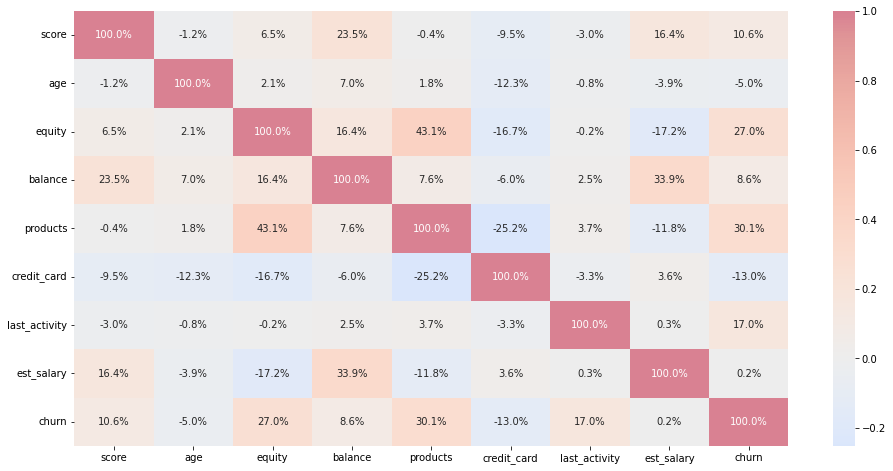

In [13]:

f, ax = plt.subplots(figsize=(16, 8))
df_corr = df.drop(['user_id'], axis=1)
sns.heatmap(df_corr.corr(), annot=True,  ax=ax, center=0, cmap='coolwarm',fmt='.1%', alpha=.5)
plt.show()

По корреляции видно, что баланс больше всего коррилирует с заработной платой, рейтингом собственности и скоринговым рейтингом. 

<div class="alert alert-block alert-danger">✍
    

__Комментарий от тимлида 3__

Как описывал на этапе декомпозиции, первым делом нужно ц создать новый признак, принимающий 1, если в наблюдении пропущено значение признака, и 0, если в наблюдении значение признака не пропущено. Далее этот признак использовать как столбец сводной таблицы, где по каждому признаку будет посчитана мера центральной тендеции (о том, как выбрать нужную меру - см.в разделе анализа портрета клиентов). Цель такого анализа - найти зависимости пропусков от данных или подтвердить отсутствие таких зависимостей. Далее с помощью тепловой карты корреляции проанализировать, от какого признака зависят пропуски

## Кодирование переменных

In [14]:
df['city_gd'] = df['city']
df['gender_gd'] = df['gender']
df = pd.get_dummies(df, columns = ['city_gd', 'gender_gd'])
df.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,city_gd_Ростов,city_gd_Рыбинск,city_gd_Ярославль,gender_gd_Ж,gender_gd_М
0,183012,850.000,Рыбинск,Ж,25,1,"59,214.820",2,0,1,"75,719.140",1,0,1,0,1,0
1,146556,861.000,Рыбинск,Ж,37,5,"850,594.330",3,1,0,"86,621.770",0,0,1,0,1,0
2,120722,892.000,Рыбинск,Ж,30,0,NaN,1,1,1,"107,683.340",0,0,1,0,1,0
3,225363,866.000,Ярославль,Ж,51,5,"1,524,746.260",2,0,1,"174,423.530",1,0,0,1,1,0
4,157978,730.000,Ярославль,М,34,5,174.000,1,1,0,"67,353.160",1,0,0,1,0,1


In [15]:
df = df.rename (columns = ({'city_gd_Ростов':'Ростов', 
                                'city_gd_Рыбинск':'Рыбинск',
                                'city_gd_Ярославль':'Ярославль', 
                                'gender_gd_Ж':'woman',
                                'gender_gd_М':'man'}))
df.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль,woman,man
0,183012,850.000,Рыбинск,Ж,25,1,"59,214.820",2,0,1,"75,719.140",1,0,1,0,1,0
1,146556,861.000,Рыбинск,Ж,37,5,"850,594.330",3,1,0,"86,621.770",0,0,1,0,1,0
2,120722,892.000,Рыбинск,Ж,30,0,NaN,1,1,1,"107,683.340",0,0,1,0,1,0
3,225363,866.000,Ярославль,Ж,51,5,"1,524,746.260",2,0,1,"174,423.530",1,0,0,1,1,0
4,157978,730.000,Ярославль,М,34,5,174.000,1,1,0,"67,353.160",1,0,0,1,0,1


<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__

Кодирование проведено корректно. Так держать!)

## Работа с дубликатами

In [16]:
df.duplicated().sum()

0

In [17]:
df[df['user_id'].duplicated(keep=False)].sort_values(by = 'user_id').head(10)


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль,woman,man
1893,116540,883.000,Рыбинск,Ж,55,1,"362,756.490",3,0,1,"175,920.480",1,0,1,0,1,0
7694,116540,887.000,Ярославль,Ж,38,0,NaN,1,0,1,"119,247.610",0,0,0,1,1,0
4866,117943,855.000,Рыбинск,Ж,32,6,"1,036,832.930",4,1,1,"107,792.710",1,0,1,0,1,0
7542,117943,880.000,Ярославль,Ж,40,0,NaN,1,1,0,"137,718.930",0,0,0,1,1,0
5863,120258,908.000,Рыбинск,Ж,38,4,"2,213,581.630",2,0,1,"160,327.770",1,0,1,0,1,0
5896,120258,905.000,Ярославль,М,30,0,NaN,1,1,1,"146,427.960",0,0,0,1,0,1
1411,123461,829.000,Ярославль,Ж,59,0,"96,222.440",2,0,1,"102,771.550",1,0,0,1,1,0
8638,123461,934.000,Рыбинск,М,34,0,NaN,2,1,0,"291,619.270",0,0,1,0,0,1
9775,124450,758.000,Рыбинск,Ж,36,0,"73,574.070",2,0,1,"79,963.590",0,0,1,0,1,0
8164,124450,859.000,Ярославль,Ж,38,6,"516,811.200",1,1,1,"95,144.630",1,0,0,1,1,0


<div class="alert alert-block alert-danger">✍
    

__Комментарий от тимлида №1__

Отсутствует вывод по неявным дубликатам (оставляем, или удаляем? И почему?)

Тут я чуть затрудняюсь ответить. Мне кажется, что данные дубликаты образуются из-за ошибки в системе , которая присваивает user_id, тк у одинаковых user_id могут быть как разные города, так и разный гендер. Я оставил, тк думаю, что это разные люди. 

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №2__

Согласен

<div class="alert alert-block alert-danger">✍
    

__Комментарий от тимлида №1__

Отсутствует вывод о качестве исходных данных. Поправишь, пожалуйста?
</div>

В общем и целом данные неплохие. Поменять бы изначально тип данных в столбце возраста, тк возраст не может быть дробным число. Также следует обратить внимание на пропуски в столбце баланца, явно есть зависимость пропусков в данных столбцах. Также надо присмотреться к системе, которая распределяет идентификатор пользователя, тк имеются дубликаты. 

## EDA

Проведем категоризацию данных по возрасту отточных клиентов. 

<Axes: title={'center': 'распределение отточных клиентов по возрасту '}, xlabel='возраст', ylabel='количество отточных людей'>

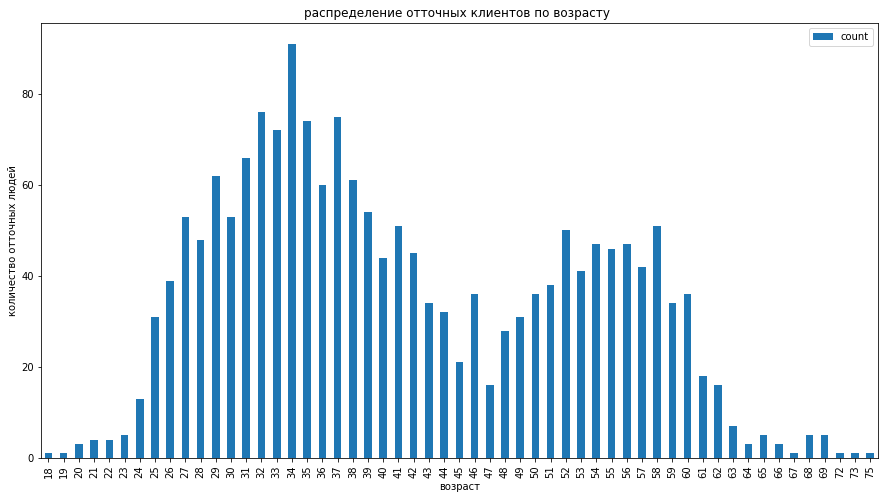

In [18]:
df[df['churn']==1]['age'].value_counts().\
reset_index().rename(columns={'index':'age', 'age':'count'}).\
sort_values(by='age').\
plot(kind='bar', figsize = (15,8), x = 'age', y = 'count',\
     title = 'распределение отточных клиентов по возрасту ',\
     xlabel = 'возраст',\
    ylabel = 'количество отточных людей')



<div class="alert alert-block alert-danger">✍
    

__Комментарий от тимлида №1__

График по данным построен корректно, но не оформлен до конца. Суть в том, что график должен быть наглядным без контекста (т.к. в реальной практике ты будешь показывать презентации или отчет сторонним людям).

Тебе необходимо проследить чтобы всегда был заголовок и подписаны оси. Доработай этот момент пожалуйста.

Данное замечания относится ко всему проекту и перепроверь его самостоятельно. Далее не буду акцентировать на этом внимание

По диаграмме отточных клиентов по возрастам можно выделить следующие категории:
- от 18 - до 24 года
- от 25 - до 44 года
- от 45 - до 62 года
- от 62 и более

Напишем функцию для распределения клиентов по возрастам. 

In [19]:
def age_2(age):
    if 18 <= age < 25:
        return '18-24'
    if 25 <= age < 45:
        return '25-44'
    if 45 <= age < 65:
        return '45-64'
    if age >= 65:
        return '65+'

<div class="alert alert-block alert-warning">📝
    

__Комментарий от тимлида №1__


А для чего проводишь категоризацию?

Хотел построить распределение по  категориям возраста, но потом передумал))

In [20]:
df['age_2'] = df['age'].apply(age_2)
df

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль,woman,man,age_2
0,183012,850.000,Рыбинск,Ж,25,1,"59,214.820",2,0,1,"75,719.140",1,0,1,0,1,0,25-44
1,146556,861.000,Рыбинск,Ж,37,5,"850,594.330",3,1,0,"86,621.770",0,0,1,0,1,0,25-44
2,120722,892.000,Рыбинск,Ж,30,0,NaN,1,1,1,"107,683.340",0,0,1,0,1,0,25-44
3,225363,866.000,Ярославль,Ж,51,5,"1,524,746.260",2,0,1,"174,423.530",1,0,0,1,1,0,45-64
4,157978,730.000,Ярославль,М,34,5,174.000,1,1,0,"67,353.160",1,0,0,1,0,1,25-44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,814.000,Рыбинск,М,27,1,"78,144.650",1,0,1,"18,943.640",0,0,1,0,0,1,25-44
9996,139170,894.000,Ярославль,М,46,0,NaN,1,1,0,"196,898.290",0,0,0,1,0,1,45-64
9997,115639,903.000,Ярославль,М,24,0,NaN,2,1,1,"108,905.090",0,0,0,1,0,1,18-24
9998,148700,777.000,Ярославль,Ж,68,3,"865,457.970",3,0,1,"86,874.900",0,0,0,1,1,0,65+


In [21]:
df['age_2_2'] = df['age_2']
df


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль,woman,man,age_2,age_2_2
0,183012,850.000,Рыбинск,Ж,25,1,"59,214.820",2,0,1,"75,719.140",1,0,1,0,1,0,25-44,25-44
1,146556,861.000,Рыбинск,Ж,37,5,"850,594.330",3,1,0,"86,621.770",0,0,1,0,1,0,25-44,25-44
2,120722,892.000,Рыбинск,Ж,30,0,NaN,1,1,1,"107,683.340",0,0,1,0,1,0,25-44,25-44
3,225363,866.000,Ярославль,Ж,51,5,"1,524,746.260",2,0,1,"174,423.530",1,0,0,1,1,0,45-64,45-64
4,157978,730.000,Ярославль,М,34,5,174.000,1,1,0,"67,353.160",1,0,0,1,0,1,25-44,25-44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,814.000,Рыбинск,М,27,1,"78,144.650",1,0,1,"18,943.640",0,0,1,0,0,1,25-44,25-44
9996,139170,894.000,Ярославль,М,46,0,NaN,1,1,0,"196,898.290",0,0,0,1,0,1,45-64,45-64
9997,115639,903.000,Ярославль,М,24,0,NaN,2,1,1,"108,905.090",0,0,0,1,0,1,18-24,18-24
9998,148700,777.000,Ярославль,Ж,68,3,"865,457.970",3,0,1,"86,874.900",0,0,0,1,1,0,65+,65+


Теперь нам нужно закодировать данные с возрастом с помощью pandas.get_dummies().

In [22]:
df = df.rename (columns = ({'age_2_2_18-24':'18-24', 
                                'age_2_2_25-44':'25-44',
                                'age_2_2_45-64':'45-64', 
                                'age_2_2_65+':'65+'}))
df = pd.get_dummies(df, columns = ['age_2_2'])
df.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,...,Ростов,Рыбинск,Ярославль,woman,man,age_2,age_2_2_18-24,age_2_2_25-44,age_2_2_45-64,age_2_2_65+
0,183012,850.000,Рыбинск,Ж,25,1,"59,214.820",2,0,1,...,0,1,0,1,0,25-44,0,1,0,0
1,146556,861.000,Рыбинск,Ж,37,5,"850,594.330",3,1,0,...,0,1,0,1,0,25-44,0,1,0,0
2,120722,892.000,Рыбинск,Ж,30,0,NaN,1,1,1,...,0,1,0,1,0,25-44,0,1,0,0
3,225363,866.000,Ярославль,Ж,51,5,"1,524,746.260",2,0,1,...,0,0,1,1,0,45-64,0,0,1,0
4,157978,730.000,Ярославль,М,34,5,174.000,1,1,0,...,0,0,1,0,1,25-44,0,1,0,0


<Axes: title={'center': 'Количество отточных людей по гендеру'}, xlabel='Пол', ylabel='количество людей'>

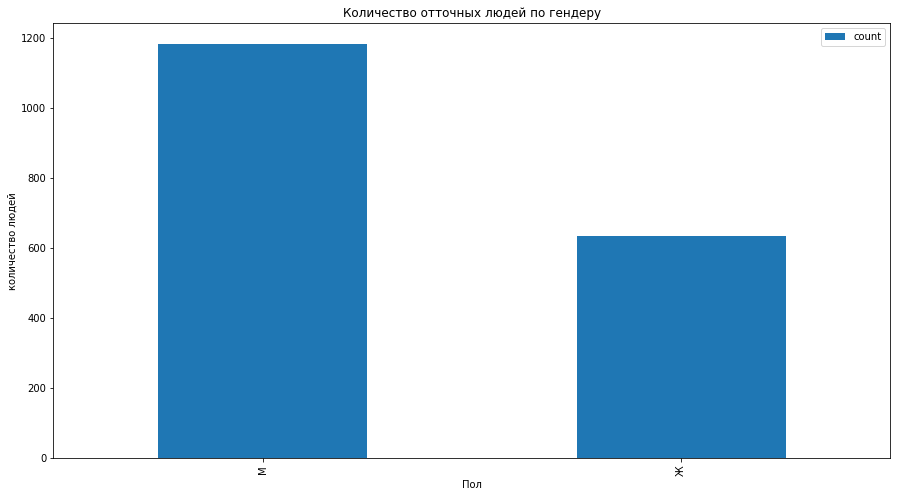

In [23]:
df[df['churn']==1]['gender'].value_counts().reset_index().rename(columns={'index':'gender', 'gender':'count'}).\
plot(kind='bar', figsize = (15,8), x = 'gender', y = 'count',\
     title = 'Количество отточных людей по гендеру', xlabel = 'Пол', ylabel = 'количество людей')


<div class="alert alert-block alert-danger">✍
    

__Комментарий от тимлида №2__

Отсутстсует оформление графика и далее тоже. Пожалуйста, поправить оформление графиков по всему проекту самостоятельно

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №3__

Спасибо за правки

По диаграмме видно, что отточных клиентов по полу больше всего мужчин. 

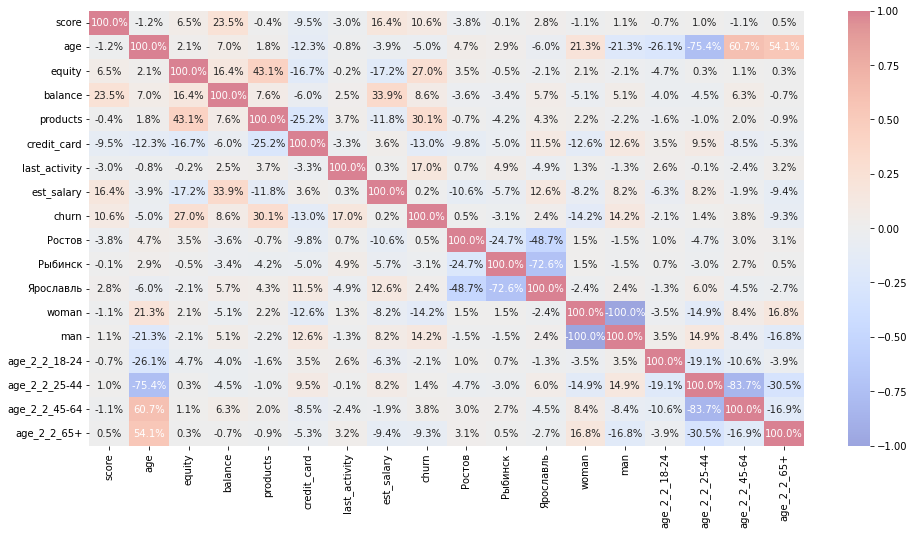

In [24]:
f, ax = plt.subplots(figsize=(16, 8))
df_cor = df.drop(['user_id'], axis=1)
sns.heatmap(df_cor.corr(), annot=True,  ax=ax, center=0, cmap='coolwarm',fmt='.1%', alpha=.5)
plt.show()

<div class="alert alert-block alert-danger">✍
    

__Комментарий от тимлида №1__

user_id не нужно анализировать на предмет корреляции Тут user_id может быть связана с хронологией (но при этом корреляцию Пирсона тоже смотреть некорректно, т.к. то что у одного клиента id на тысячу больше чем у другого не говорит нам о конкретном чётком сроке заключения первого договора с банком).


наибольшая корреляция с показателем оттока клиентов:
- скоринговый рейтинг клиента (score)
- оценка объектов собственности клиента (equity),
- количество продуктов, которыми пользуется клиент (products),
- наличие кредитной карты (credit_card),
- активность пользователя (last_activity),
- пол пользователя (столбцы man и woman),
- возраст пользователя.

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №2__

Учтено

### скоринговый рейтинг клиента

,sum,count,percent
score,,,
999.000,1,2,50.000
984.000,1,3,33.333
980.000,1,4,25.000
970.000,1,4,25.000
974.000,1,5,20.000
"1,000.000",1,6,16.667
707.000,1,6,16.667
988.000,1,6,16.667
990.000,1,7,14.286


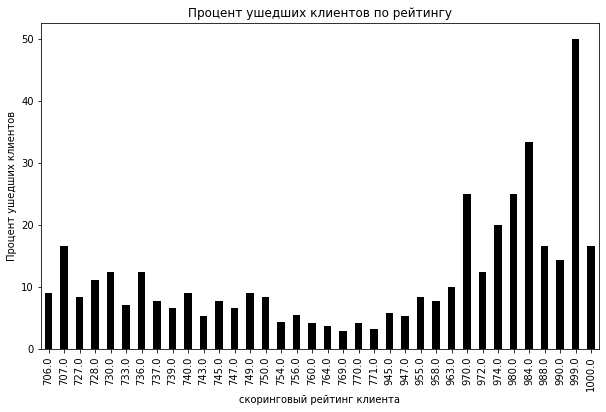

In [25]:
score_1 = df.pivot_table (index = 'score', values = 'churn', aggfunc =['sum', 'count'])
score_1.columns = score_1.columns.droplevel(level=1)
score_1 ['percent'] = score_1['sum']/score_1['count']*100
score_1 = score_1 [score_1['sum']==1]
score_1['percent'].plot (
    kind='bar', title = 'Процент ушедших клиентов по рейтингу',
    xlabel = 'скоринговый рейтинг клиента', ylabel = 'Процент ушедших клиентов', figsize = (10,6), color = 'black')
score_1.sort_values(by = 'percent', ascending = False)

Из банка уходят клиенты с рейтингом не ниже 706. От 706 до 771 тенденция к уходу снижается. Но начиная с 771 люди уходят. Чем выше рейтинг - тем больше людей уходят. 

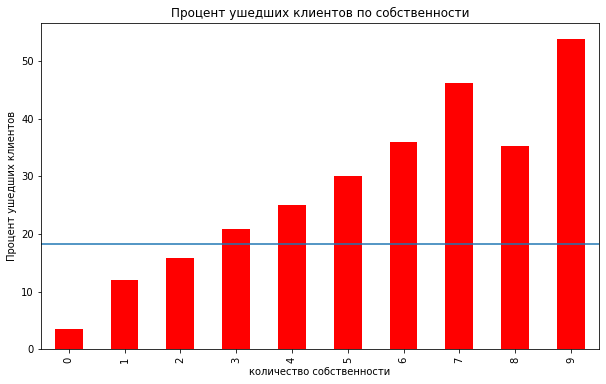

In [26]:
equity_1 = df.pivot_table (index = 'equity', values = 'churn', aggfunc = ['count', 'sum'])
equity_1['percent'] = equity_1['sum']/equity_1['count']*100
equity_1.columns = equity_1.columns.droplevel(level=1)
equity_1['percent'].plot (
    kind='bar', title = 'Процент ушедших клиентов по собственности',
    xlabel = 'количество собственности', ylabel = 'Процент ушедших клиентов', figsize = (10,6), color = 'red')
equity_1
plt.axhline(df['churn'].mean()*100)


Чем больше собственности у клиента - тем выше шанс того, что он уйдет. 

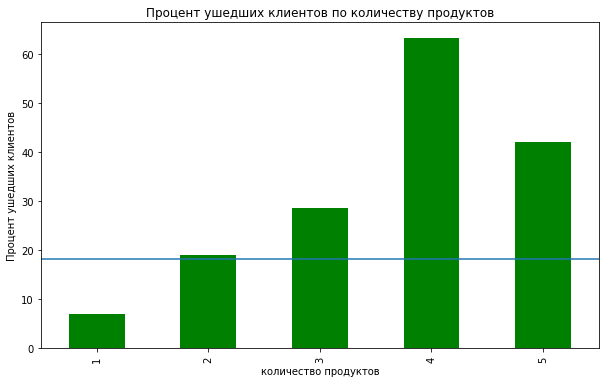

In [27]:
products_1 = df.pivot_table (index = 'products', values = 'churn', aggfunc = ['sum', 'count'])
products_1.columns = products_1.columns.droplevel(level=1)
products_1 ['percent'] = products_1['sum']/products_1['count']*100
products_1['percent'].plot (
    kind='bar', title = 'Процент ушедших клиентов по количеству продуктов',
    xlabel = 'количество продуктов', ylabel = 'Процент ушедших клиентов', figsize = (10,6), color = 'green')
products_1
plt.axhline(df['churn'].mean()*100)

<div class="alert alert-block alert-danger">✍
    

__Комментарий от тимлида №2__

Как описывал ранее - нельзя быть клиеентов банка (ниже ты верно описываешь, а график построен с нулем). Поправь, пожалуйста

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №3__

Учтено

Клиент с количеством продуктов 0 - не является клиентом данного банка. Следовательно это выброс. У людей с 2,3,5 продуктами процент ухода 20-30%, а у людей имеющих 4 продукта - самая большая вероятность ухода - более 60%. Меньше всего отточных клиентов у владельцев одного продукта. 

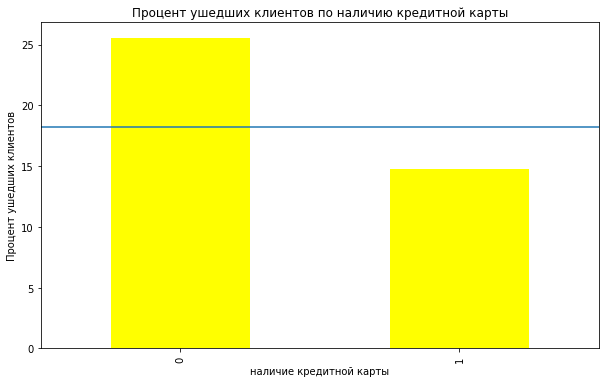

In [28]:
credit_card_1 = df.pivot_table (index = 'credit_card', values = 'churn', aggfunc = ['sum', 'count'])
credit_card_1.columns = credit_card_1.columns.droplevel(level=1)
credit_card_1 ['percent'] = credit_card_1['sum']/credit_card_1['count']*100
credit_card_1
credit_card_1['percent'].plot (
    kind='bar', title = 'Процент ушедших клиентов по наличию кредитной карты',
    xlabel = 'наличие кредитной карты', ylabel = 'Процент ушедших клиентов', figsize = (10,6), color = 'yellow')
credit_card_1
plt.axhline(df['churn'].mean()*100)

Людей, у которых не было кредитной карты ушло в 2 раза больше, чем у тех у которых она была. 

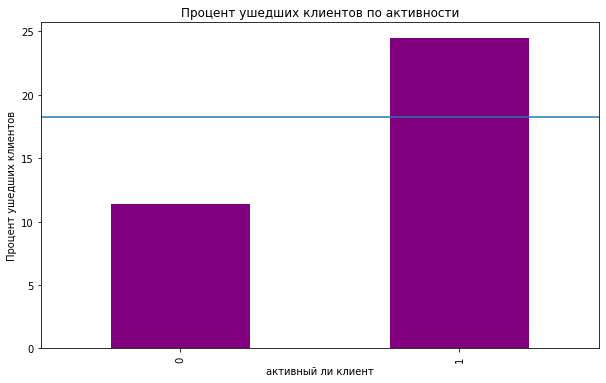

In [29]:
last_activity_1 = df.pivot_table (index = 'last_activity', values = 'churn', aggfunc = ['sum', 'count'])
last_activity_1.columns = last_activity_1.columns.droplevel(level=1)
last_activity_1 ['percent'] = last_activity_1['sum']/last_activity_1['count']*100
last_activity_1
last_activity_1['percent'].plot (
    kind='bar', title = 'Процент ушедших клиентов по активности',
    xlabel = 'активный ли клиент', ylabel = 'Процент ушедших клиентов', figsize = (10,6), color = 'purple')
last_activity_1
plt.axhline(df['churn'].mean()*100)

По данным более активные клиенты уходят намного чаще, чем неактивные. Это можно связать с тем, что активные клиенты чаще пользуются услугами МЕТАНПРОМБАНК и имеют негативный опыт. В итоге уходят из банка. 

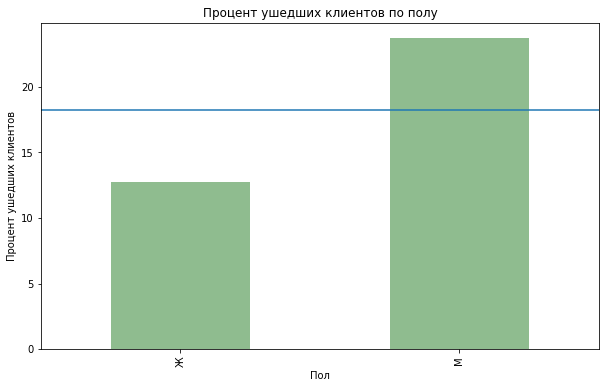

In [30]:
gender_1 = df.pivot_table (index = 'gender', values = 'churn', aggfunc = ['sum', 'count'])
gender_1.columns = gender_1.columns.droplevel(level=1)
gender_1 ['percent'] = gender_1['sum']/gender_1['count']*100
gender_1
gender_1['percent'].plot (
    kind='bar', title = 'Процент ушедших клиентов по полу',
    xlabel = 'Пол', ylabel = 'Процент ушедших клиентов', figsize = (10,6), color = 'darkseagreen')
gender_1
plt.axhline(df['churn'].mean()*100)

Мужчин уходит в 2 раза больше, чем женщин  

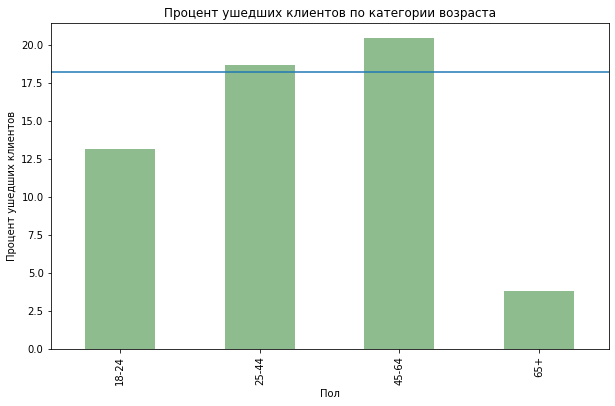

In [31]:
age_1 = df.pivot_table (index = 'age_2', values = 'churn', aggfunc = ['sum', 'count'])
age_1.columns = age_1.columns.droplevel(level=1)
age_1 ['percent'] = age_1['sum']/age_1['count']*100
age_1
age_1['percent'].plot (
    kind='bar', title = 'Процент ушедших клиентов по категории возраста',
    xlabel = 'Пол', ylabel = 'Процент ушедших клиентов', figsize = (10,6), color = 'darkseagreen')
age_1
plt.axhline(df['churn'].mean()*100)

На графике видно, что отток больше всего в возрастной группе 45-64, чуть меньше в группе 25-44. Меньше всего уходят люди в возрасте 65+. 

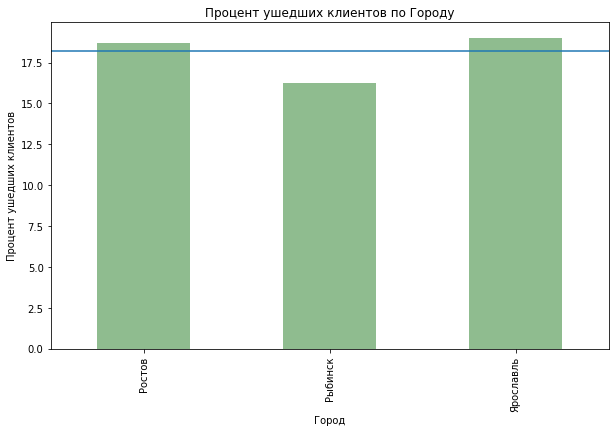

In [32]:
city_1 = df.pivot_table (index = 'city', values = 'churn', aggfunc = ['sum', 'count'])
city_1.columns = city_1.columns.droplevel(level=1)
city_1 ['percent'] = city_1['sum']/city_1['count']*100
city_1['percent'].plot (
    kind='bar', title = 'Процент ушедших клиентов по Городу',
    xlabel = 'Город', ylabel = 'Процент ушедших клиентов', figsize = (10,6), color = 'darkseagreen')
city_1
plt.axhline(df['churn'].mean()*100)

<div class="alert alert-block alert-danger">✍
    

__Комментарий от тимлида №1__

Тут несколько моментов, на которые стоит обратить внимание в этом шаге:    

1. Некорректны графики для нелинейных признаков (посмотри, пожалуйста, этап декомпозиции - в нем подробно описано, как их нужно строить). Нелинейные признаки - (баланс, зарплата, возраст и скоринг)
2. Баланс-зарплата нужно сделать `xlim`.
3. Дискретные/категориальные продукты через  барплот и акслайн со средним уровнем оттока (сейчас только барплот, без акслайна)
4. Ноль продуктов - аномалия, предлагаю подумать, все ли значения адекватны
    


<div class="alert alert-block alert-danger">✍
    

__Комментарий от тимлида №2__

Проверь, пожалуйста, выше оформление графиков (у тебя везде одинавые подписи осей)

<div class="alert alert-block alert-danger">✍
    

__Комментарий от тимлида №2__

У нас 6 категориальных/дискретных признаков, а у тебя выше построено лишь 5 признаков

<div class="alert alert-info"> <b>Комментарии студента:</b> 👌🏻 </div>

<div class="alert alert-block alert-danger">✍
    

__Комментарий от тимлида №3__

Решение верное, но отсутствует axline (среднебанковский отток, добавь, его, пожалуйста, в барплоты)

<div class="alert alert-info"> <b>Комментарии студента:</b> 👌🏻 </div>

<div class="alert alert-block alert-danger">✍
    

__Комментарий от тимлида №4__

В наших данных среднебанковский отток 18%. Выше ты не совсем корректно считаешь

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №5__

Всё верно

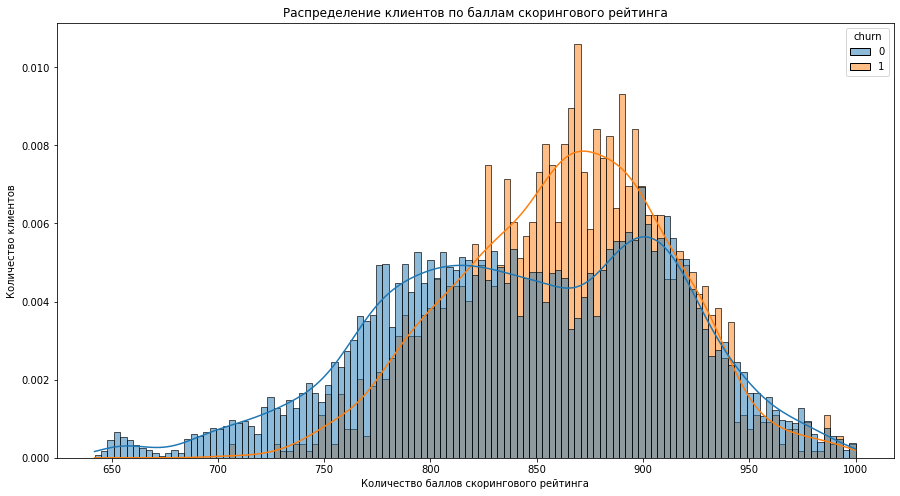

In [33]:



fig, ax = plt.subplots(figsize=(15, 8))
sns.histplot(data = df, x = "score", hue = 'churn', stat="density", common_norm=False, \
                  binwidth=3, kde=True).set(title = 'Распределение клиентов по баллам скорингового рейтинга',
                                           xlabel = 'Количество баллов скорингового рейтинга',
                                           ylabel = 'Количество клиентов')

plt.show()

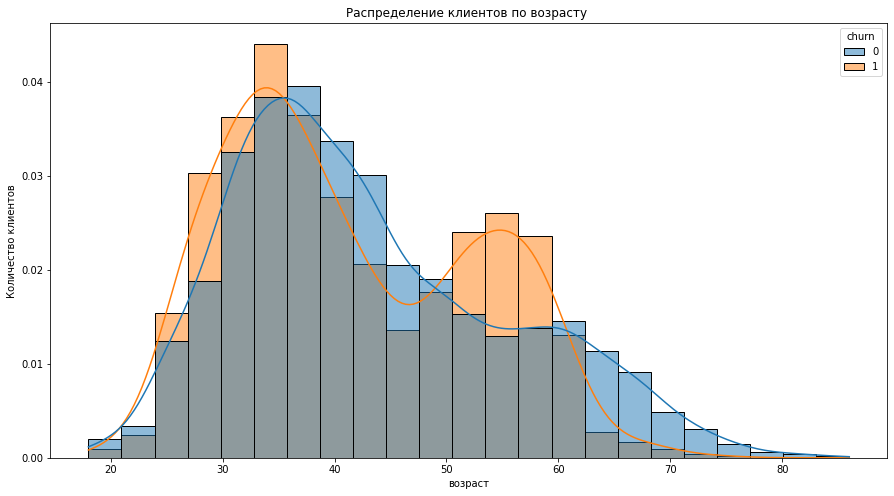

In [34]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.histplot(data = df, x = "age", hue = 'churn', stat="density", common_norm=False, \
                  binwidth=3, kde=True).set(title = 'Распределение клиентов по возрасту ',
                                           xlabel = 'возраст',
                                           ylabel = 'Количество клиентов')

plt.show()

По распределению возраста  и баллов скорингового рейтинга видно, что распределение нормальное. У отточных клиентов скоринговый рейтинг выше в районе 800-900 баллов. По возрасту распределение идентично, выбиваются только отточные клиенты 50-60 лет. 

<div class="alert alert-block alert-danger">✍
    

__Комментарий от тимлида №2__

Попробуй не использовать функцию, а построить раздельно каждый пункт + ниже показал пример по скорингу. Посмотри, пожалуйста

<div class="alert alert-block alert-danger">✍
    

__Комментарий от тимлида №2__

Попробуй не использовать функцию, а построить раздельно каждый пункт + ниже показал пример по скорингу. Посмотри, пожалуйста

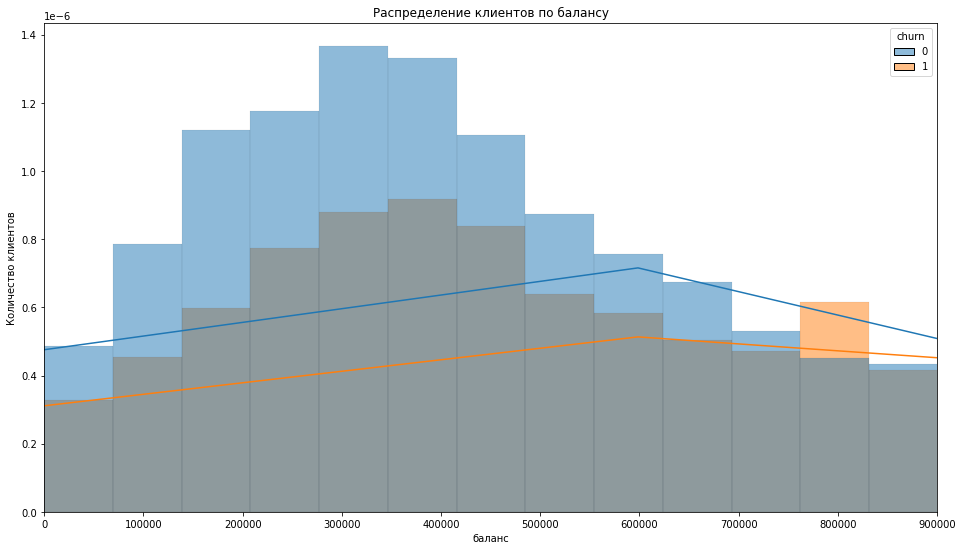

In [35]:


# строю гистограммы с распределением по баллам скорингового рейтинга, в разрезе оттока
fig, ax = plt.subplots(figsize=(16, 9))
sns.histplot(data = df, x = "balance", hue = 'churn', stat="density", common_norm=False, \
                 kde=True).set(title = 'Распределение клиентов по балансу',
                                          xlabel = 'баланс',
                                          ylabel = 'Количество клиентов')
plt.xlim(0, 900000)
plt.show()

По Распределению  балансу мы видим, что распределение нормальное.  выбиваются лояльные клиенты с балансом 0-800 000. 

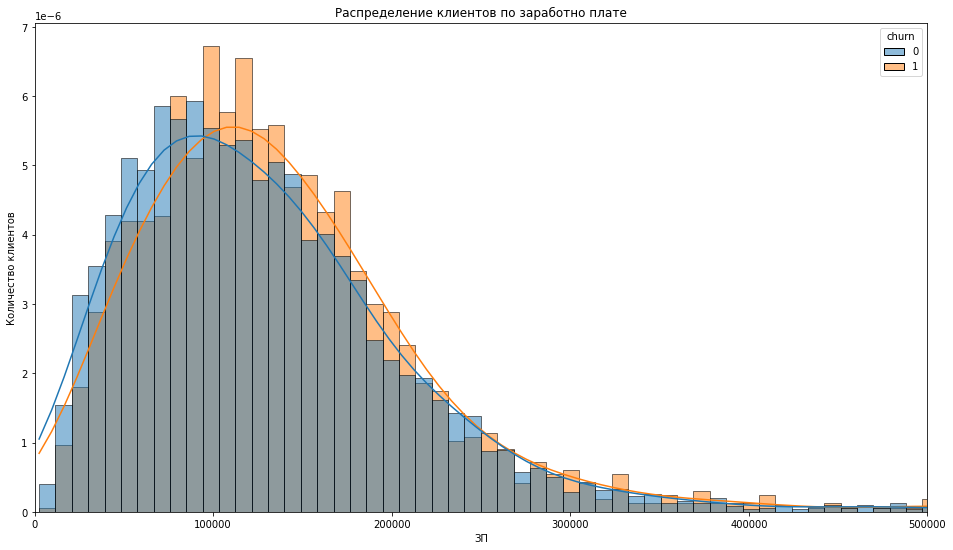

In [36]:
fig, ax = plt.subplots(figsize=(16, 9))
sns.histplot(data = df, x = "est_salary", hue = 'churn', stat="density", common_norm=False, \
                  kde=True).set(title = 'Распределение клиентов по заработно плате',
                                           xlabel = 'ЗП',
                                           ylabel = 'Количество клиентов')
plt.xlim(0, 500000)
plt.show()

По распределению ЗП  видно, что распределение нормальное. Чуть выбиваются отточные клиенты с более высокой зп в районе 100 000 - 200 000 тысяч. 

<div class="alert alert-block alert-danger">✍
    

__Комментарий от тимлида №3__

Попробуй убрать параметр `binwidth`

<div class="alert alert-block alert-danger">✍
    

__Комментарий от тимлида №4__

Как описывал ранее, Баланс-зарплата нужно сделать xlim(). Чтобы точнее проанализировать интервалы оттока

<div class="alert alert-info"> <b>Комментарии студента:</b> 👌🏻 </div>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №5__

Да, теперь корректно

### портрет клиента

In [37]:
# сделаем портрет клиента. 
import statistics as sta
port_1 = df.pivot_table (index = ['churn'],  aggfunc = {'city':sta.mode,
                                                     'gender':sta.mode,
                                                     'equity': 'median',
                                                     'products': 'median',
                                                     'est_salary':'mean',
                                                     'age':'mean',
                                                     'balance':'median',
                                                     'credit_card':sta.mode,
                                                     'last_activity':sta.mode,
                                                     'score':'mean'})
port_1.T


churn,0,1
age,43.021,41.430
balance,"475,410.090","783,908.900"
city,Ярославль,Ярославль
credit_card,1,1
equity,3,4
est_salary,"147,674.638","148,357.483"
gender,Ж,М
last_activity,0,1
products,2,2
score,845.396,863.362


<div class="alert alert-block alert-danger">✍
    

__Комментарий от тимлида №1__

Портрет клиента аналогично выполнен без учёта требований EDA: ожидаемый формат - сводная таблица с разными агрегатами для разных типов переменных `с подсчётом относительной разницы для непрерывных переменных`. Профили на основе отдельных можно выделять, но признаки должны быть проанализированы с учётом требовнаний на декомпозиции.



<div class="alert alert-block alert-danger">✍
    

__Комментарий от тимлида №4__

Ниже показал:
    
1. Сначала создадим копию нашего сводного датасета, чтобы избежать изменений в исходных данных.
2. Затем мы добавим новый столбец, вычислив относительную разницу между выбранными переменными и их средними значениями.    

In [38]:
# Создаем копию нашего сводного датасета
port_1_copy = port_1.copy()

# Вычисляем и добавляем относительную разницу между данными
port_1_copy['relative_difference'] = (port_1_copy['equity'] - port_1_copy['products']) / port_1_copy['products']

# Выводим обновленный сводный датасет
port_1_copy.T



churn,0,1
age,43.021,41.430
balance,"475,410.090","783,908.900"
city,Ярославль,Ярославль
credit_card,1,1
equity,3,4
est_salary,"147,674.638","148,357.483"
gender,Ж,М
last_activity,0,1
products,2,2
score,845.396,863.362


Тут не особо понял комментарий. Добавить относительную разницу просто?

<div class="alert alert-block alert-danger">✍
    

__Комментарий от тимлида №2__

Совершенно верно, добавить столбец с односительной разницей. Для медианы/категориальных относительную разницу считать не нужно - аналогично можно заполнить заглушкой.

In [39]:


# Создаем сводную таблицу с расчетами мер центральной тендецнии и переименуем колонки
port = df.pivot_table(index = 'churn', 
                        values = ['score', 'balance',
                                  'age', 'equity','products','est_salary'], 
                        aggfunc = {'score':'mean','age':'mean','est_salary': 'mean', 
                                   'balance':'mean','equity':'median','products':'median'})\
.rename(columns = {'score':'Средний балл','age':'Средний возраст', 
                   'est_salary':'Средняя зарплата','balance':'Средний баланс', 
                   'equity':'Медианное количество собственности', 'products':'Медианное количество продуктов'})

# Транспонируем полученный датасет для удобства работы
result = port.transpose()

# Добавим колонку с относительной разницей между данными по оттоку.
result['Относительная разница в %'] = ((result[1] - result[0])/result[0])*100

# Поскольку функция mode не работает с pivot_table, то добавим моду для категориальных признаков отдельно через append 
result = result.append(df.groupby('churn').city.agg(pd.Series.mode))
result = result.append(df.groupby('churn').gender.agg(pd.Series.mode))
result = result.append(df.groupby('churn').last_activity.agg(pd.Series.mode))
result = result.append(df.groupby('churn').credit_card.agg(pd.Series.mode))
    
# Восстановим порядок колонок и переименуем их
result = result[[1,0,'Относительная разница в %']].rename(columns = {1:'Отток', 0:'Не отток'})

# Сбросим индекс и переименуем строки city и gender
result = result.reset_index().replace({'index':{'city':'Мода по городу', 
                                                'gender': 'Мода по полу',
                                                'last_activity':'Мода по активности', 
                                                'credit_card':'Мода по кредитной карте'}})

# Проверим результат
result

churn,index,Отток,Не отток,Относительная разница в %
0,Средний возраст,41.430,43.021,-3.699
1,Средний баланс,"1,134,458.209","733,031.630",54.763
2,Медианное количество собственности,4.000,3.000,33.333
3,Средняя зарплата,"148,357.483","147,674.638",0.462
4,Медианное количество продуктов,2.000,2.000,0.000
5,Средний балл,863.362,845.396,2.125
6,Мода по городу,Ярославль,Ярославль,NaN
7,Мода по полу,М,Ж,NaN
8,Мода по активности,1.000,0.000,NaN
9,Мода по кредитной карте,1.000,1.000,NaN


Возраст отточных клиентов меньше на 2 года, баланс на карте больше на 300 тысяч, города отточных клиентов совпадают, владение кредитками также совпадают, собственности у отточных клиентов больше, ЗП на одинаковом уровне, пол отточных клиентов Мужской,  активных клиентов уходит больше, количество продуктов и рейтинг скоринга примерно одинаковы. 

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №5__

Учтено

# Портрет отточного клиента:

- возраст 41 год
- баланс на карте 1,134 млн. 
- Город Ярославль
- имеет кредитную карту
- рейтинг собственности 4
- ЗП 148000
- Мужского пола
- Активный
- 2 продукта в банке
- скоринговый рейтинг достаточно высокий - 863

<div class="alert alert-block alert-warning">📝
    

__Комментарий от тимлида №2__


Поправь, пожалуйста, выводы после корректировки

# Статистические гипотезы

Для проверки я выбрал гипотезу различия дохода между теми клиентами, которые ушли и теми, которые остались.

H0 : средние доходы между отточными и лояльными клиентами равны

Н1: средние доходы между отточными и лояльными клиентами не равны

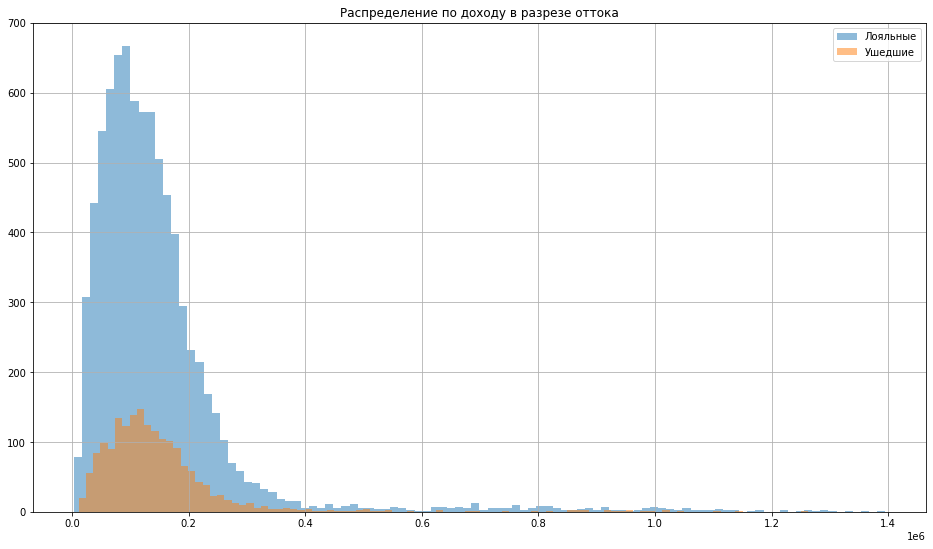

In [40]:
est_1 = df[(df['churn']==0)]['est_salary']
est_2 = df[(df['churn']==1)]['est_salary']
fig, ax = plt.subplots(figsize=(16, 9))
est_1.hist(bins = 100, alpha=0.5)
est_2.hist(bins = 100, alpha=0.5);
plt.title('Распределение по доходу в разрезе оттока')
plt.legend(['Лояльные', 'Ушедшие'])
plt.show();

 Полученной выборки достаточно, они не зависимы друг от друга. Проверять гипотезу будем с помощью t-теста.

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__

Верная интерпритация нулевой и альтернативной гипотез
</div>

<div class="alert alert-block alert-danger">✍
    

__Комментарий от тимлида №1__

Отсутствует обоснование выбора гипотезы (почему именно Стьюдента, а не U-test). Для этого нужно обратиться к ЦПТ, в идеале сделать тест на нормальность распределния данных

<div class="alert alert-block alert-danger">✍
    

__Комментарий от тимлида №2__

А где обоснование? (выше только график, без интерпретаций)

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №3__

Верно, согласно ЦПТ наши выборки достаточно большие

In [41]:
results = st.ttest_ind (
    df[df['churn']==0]['est_salary'],
    df[df['churn']==1]['est_salary'], equal_var = False)
alpha = .05
print (results.pvalue) 
if results.pvalue < alpha:
    print ('Отвергаем нулевую гипотезу')
else:
    print ('Не получилось отвергнуть нулевую гипотезу')

0.8354803526840116
Не получилось отвергнуть нулевую гипотезу


Проверка гипотезе о разности средней заработной платы у отточных и лояльныйх клиентов показала, что отличий нет. Следовательно гипотезу отвергнуть нельзя. 

гипотеза различия равенства возраста в зависимости от количества продуктов.

Н0: средний возраст клиентов, использующих один продукт равен среднему возрасту клиентов, использующих два продукта

Н1: средний возраст клиентов, пользующихся одним продуктом банка не равен среднему возраст клиентов, пользующихся двумя продуктами

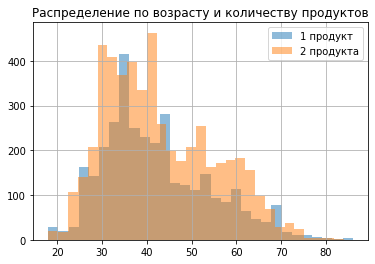

In [42]:
prod_1 = df[(df['products']==1)]['age']
prod_2 = df[(df['products']==2)]['age']   
prod_1.hist(bins = 30, alpha=0.5)
prod_2.hist(bins = 30, alpha=0.5);
plt.title('Распределение по возрасту и количеству продуктов')
plt.legend(['1 продукт', '2 продукта'])
plt.show();

 выборки достаточно велики, не зависят друг от друга.

<div class="alert alert-block alert-danger">✍
    

__Комментарий от тимлида №1__

Тут аналогично

<div class="alert alert-block alert-danger">✍
    

__Комментарий от тимлида №2__

Тут аналогично

In [43]:
results = st.ttest_ind(prod_1, prod_2, equal_var=False)

alpha = 0.05

print(results.pvalue) 
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

0.03299080704232691
Отвергаем нулевую гипотезу


Отвергаем нулевую гипотезу.  в среднем возрасте клиентов, пользующихся одним и двумя продуктами есть различие.

<div class="alert alert-block alert-danger">✍
    

__Комментарий от тимлида №2__

Вывод не совсем наглядный. Не ясно какие выборки ты сравнивал
</div>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №3__

Методологически проверка гипотез проведена верно и наглядный вывод результатов. Так держать!
</div>

# Сегментация

По итогам проведенного анализа и проверки гипотез выделим несколько высокоотточных сегментов пользователей.

- пол
- возраст 
- количество собственности 
- скоринговый рейтинг. 

**Сегмент 1.**
- Возраст 25-35
- Пол Мужской
- Скор. рейтинг 700+
- количество собственности 3 и более

In [44]:
print('количество людей сегмента №1:', df.query (
    'man==1 and equity>=3 and score >= 700 and age >=25 and \
    age <= 35 and score >= 700')['user_id'].count())
print ('количество отточных клиентов сегмента №1:', df.query (
    'man==1 and equity>=3 and score >= 700 and age >=25 and \
    age <= 35 and score >= 700 and churn == 1')['user_id'].count())
print ('доля отточных клиентов сегмента №1:', df.query (
    'man==1 and equity>=3 and score >= 700 and age >=25 and age <= 35 \
    and score >= 700 and churn == 1')['user_id'].count() / df.query (
    'man==1 and equity>=3 and score >= 700 and age >=25 and \
    age <= 35 and score >= 700')['user_id'].count()*100)

количество людей сегмента №1: 967
количество отточных клиентов сегмента №1: 385
доля отточных клиентов сегмента №1: 39.813857290589446


**Сегмент 2.**
- Пол мужской
- не активный
- имеет кредитную карту

In [45]:

print ('Общее число пользователей в сегменте №2:', df.query (
    'man==1  \
     and last_activity == 0 and credit_card ==1')['user_id'].count())
print ('Общее число оттока пользователей в сегменте №2:', df.query (
    'man==1  \
    and products >= 2 and credit_card ==1 and churn ==1')['user_id'].count())
print('Общее число пользователей в сегменте №2:', df.query (
    'man==1  and products >= 2 and credit_card ==1 and churn ==1')['user_id'].count()/ df.query (
    'man==1  and products >= 2 and credit_card ==1')['user_id'].count()*100)

Общее число пользователей в сегменте №2: 1829
Общее число оттока пользователей в сегменте №2: 567
Общее число пользователей в сегменте №2: 26.795841209829867


**Сегмент 3.**
- Возраст 46-62
- Пол любой
- Город Ярославль
- не имеет кредитную карту

In [46]:

print ('Общее число пользователей в сегменте №3:', df.query (
    ' age>=46 \
    and age<=62  and Ярославль ==1 and credit_card == 0')['user_id'].count())
print ('Общее число оттока пользователей в сегменте №3:', df.query (
    'age>=46 \
    and age<=62  and Ярославль ==1 and credit_card == 0 and churn ==1')['user_id'].count())
print('Общее число пользователей в сегменте №3:', df.query (
    'age>=46 \
    and age<=62  and Ярославль ==1 and credit_card == 0 and churn ==1')['user_id'].count()/ df.query (
    'age>=46 \
    and age<=62  and Ярославль ==1 and credit_card == 0')['user_id'].count()*100)

Общее число пользователей в сегменте №3: 516
Общее число оттока пользователей в сегменте №3: 168
Общее число пользователей в сегменте №3: 32.55813953488372


<div class="alert alert-block alert-danger">✍
    

__Комментарий от тимлида №2__

Сегменты построены на одних и тех же признаках - так мы повышаем риски того, что выделенная нами аудитория будет нечувствительна к мероприятиям по удержанию, а другую аудиторию мы не знаем.

Сегменты должны быть разнородными, допускается пересечение по одному признаку между сегментами, но не более.

<div class="alert alert-block alert-danger">✍
    

__Комментарий от тимлида №3__

В твоих сегментах признаки пересекаются более одного раза (например в 1 и 2 = возраст и пол). допускается пересечение по одному признаку между сегментами, но не более.

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №4__
Отличные сегменты. молодец

# Приоритизация сегментов

Расположим сегментацию в порядке убывания. 

**Сегмент 1 с показателем оттока 40%.**
- Возраст 25-35
- Пол Мужской
- Скор. рейтинг 700+
- количество собственности 3 и более

**Сегмент 3 с показателем оттока 32.5%.**

- Возраст 46-62
- Пол любой
- Город Ярославль
- не имеет кредитную карту

**Сегмент 2 с показателем оттока 28%.**
- Пол мужской
- не активный
- имеет кредитную карту




<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__
С логикой приоритизации согласен

# Выводы и рекомендации

1. Был проведен анализа отточных клиентов. С помощью корреляции  выявили, какие параметры больше всего влияют на отток.
Такие параметры как:

- **скоринговый рейтинг клиента (score)**
- **оценка объектов собственности клиента (equity)**,
- **количество продуктов, которыми пользуется клиент (products)**,
- **наличие кредитной карты (credit_card)**,
- **активность пользователя (last_activity)**,
- **пол пользователя (столбцы man и woman)**,
- **возраст пользователя**.

2. Проведен статистический анализ гипотез:

- **H0 : средние доходы между отточными и лояльными клиентами равны** - не получилось ее отергнуть. 

- **H0средний возраст клиентов, использующих один продукт равен среднему возрасту клиентов, использующих два продукта.** - Отвергаем нулевую гипотезу.  в среднем возрасте клиентов, пользующихся одним и двумя продуктами есть различие - отвергли данную гипотезу, тк среднее количество собственности отточных и активных клиентов действительно разнится. 

3. Были выявлены и определены разные сегменты клиентов, которые подвержены оттоку из банка. 


### Рекомендации отделу маркетинга. 

- Поработать над тем, чтобы удерживать клиентов, придумать систему лояльности.
- Поработать над удержанием более старшего населения и принять адекватные меры, тк отток более взрослого населения очень большой. 
- Проработать систему лояльности с мужской аудиторией банка, тк отток мужчин в 2 раза больше женского.
- Улучшить систему оплаты ЖКК в банке, тк среднее количество собственности у отточных клиентов 4. Можно добавить кэшбек за оплату ЖКХ. 
- Предложить отточным клиентам свои новые продукты на выгодных условиях, тк их среднее количество продуктов банка - 2, а также информировать их об выходе нового продукта. 
- Проверить работоспособность банка в Ярославле, тк наибольший отток поступает из этого города. 
- Пересмотреть приложение и обратную связь банка, тк активных отточных клиентов больше, чем неактивных. 

**Сегмент 1 с показателем оттока 40%.**
- Возраст 25-35
- Пол Мужской
- Скор. рейтинг 700+
- количество собственности 3 и более

Предложения:
- информировать о новых доступных банковских продуктах;
- для клиентов, получающих зарплату на карту другого банка - предложить льготные условия для перевода зарплаты в наш банк;
- ввести кэшбеки на походы в ресторан, развлечения и тд, тк аудитори молодая

**Сегмент 3 с показателем оттока 32.5%.**

- Возраст 46-62
- Пол любой
- Город Ярославль
- не имеет кредитную карту

Предложения:
- информировать о новых доступных банковских продуктах;
- для клиентов, получающих зарплату на карту другого банка - предложить льготные условия для перевода зарплаты в наш банк;
- предложить кэшбеки на магазины для отдыха, детские магазины, аптеки
- предложить оформить банковскую карту на выгодных условиях

**Сегмент 2 с показателем оттока 28%.**
- Пол мужской
- не активный
- имеет кредитную карту

Предложения:
- информировать о новых доступных банковских продуктах;
- для клиентов, получающих зарплату на карту другого банка - предложить льготные условия для перевода зарплаты в наш банк;
- предложить оформить банковскую карту на выгодных условиях
- Предложить бонусы или какие-либо выгодные условия на кредитование. 
- сделать рассылку или звонки для уточнения причины их неактивности. 





<div class="alert alert-block alert-danger">✍
    

__Комментарий от тимлида №1__

Нужно дать рекомендации для каждого сегмента. Поправь, пожалуйста

<div class="alert alert-block alert-danger">✍
    

__Комментарий от тимлида №2__

Не забудь подкорректировать вывод после исправлений

<div class="alert alert-block alert-warning">📝
Комментарий от тимлида №1 </b>



Итог ревью - ты проделал хорошую работу! Многие расчеты корректные, грамотная интерпретация полученных результатов! У тебя есть понимание данного процесса. Но есть некоторые моменты которые тебе предстоит доработать, чтобы я смог принять твой проект. Если возникнут вопросы - обязательно задавай. Буду ждать!

---

Нужно поправить:

1) Оформление графиков

2) Тип пропуска

3) Неявные дубликаты

4) Выводы по разделам

5) Анализ распределения признаков

6) Корреляция

7) Портрет клиента

8) Обоснование выбора гипотез

9) Сегментация

10) Финальный вывод

11) Подправить выводы, после изменений

----


Если у тебя будут какие-то вопросы по моим комментариям - обязательно пиши! Буду ждать работу на повторное ревью :)</div>

<div class="alert alert-block alert-warning">📝
Комментарий от тимлида №2 </b>



Отличная работа, осталось поправить несколько моментов:

---

Нужно поправить:

1) Оформление графиков

2) Тип пропуска

3) Анализ распределения признаков

4) Портрет клиента

5) Обоснование выбора гипотез

6) Сегментация

7) Подправить выводы, после изменений

----


Если у тебя будут какие-то вопросы по моим комментариям - обязательно пиши! Буду ждать работу на повторное ревью :)</div>

<div class="alert alert-block alert-warning">📝
Комментарий от тимлида №3 </b>



Последние штрихи:

---

Нужно поправить:


1) Анализ распределения признаков

2) Портрет клиента

3) Сегментация

4) Подправить выводы, после изменений

----


Если у тебя будут какие-то вопросы по моим комментариям - обязательно пиши! Буду ждать работу на повторное ревью :)</div>

<div class="alert alert-block alert-warning">📝
Комментарий от тимлида №4 </b>



Последние штрихи:

---

Нужно поправить:


1) Анализ распределения признаков

2) Портрет клиента

3) Подправить выводы, после изменений

----


Если у тебя будут какие-то вопросы по моим комментариям - обязательно пиши! Буду ждать работу на повторное ревью :)</div>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №5__
    
PS. Презентацию присылай в ЛС в пачке
    
---

От себя хочу порекомендовать тебе отличную книгу про язык Python. Она очень классная (можно купить как новую, так и на Авито попадается. Вот ссылка на pdf этой книги)
    
https://monster-book.com/avtomatizaciya-zadach-s-python
    
---
    


Все замечания учтены. Успехов на АВ тесте!
</div>